In [124]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
imdb = pd.read_csv("../datas/prepared/final_dataset.csv", index_col=0, encoding="ISO-8859-1")
omdb = pd.read_csv("../datas/raw/full_omdb.csv", encoding="ISO-8859-1")

In [5]:
omdb.head()

,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,Poster,...,Response,Runtime,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes
Actors,,,,,,,,,,,,,,,,,,,,,
"Pola Negri, Emil Jannings, Harry Liedtke, Eduard von Winterstein",NaN,NaN,Germany,NaN,Ernst Lubitsch,"Biography, Drama",German,NaN,"The story of Madame DuBarry, the mistress of L...",https://images-na.ssl-images-amazon.com/images...,...,True,85 min,Madame DuBarry,movie,NaN,"Norbert Falk, Hanns Kräly",1919,tt0002423,6.9,565
"René Navarre, Edmund Breon, Georges Melchior, Renée Carl",1 nomination.,NaN,France,NaN,Louis Feuillade,"Crime, Drama",French,NaN,In Part Two of Louis Feuillade's 5 1/2-hour ep...,https://images-na.ssl-images-amazon.com/images...,...,True,61 min,Fantômas: Juve versus Fantômas,movie,NaN,"Marcel Allain (novel), Louis Feuillade, Pierre...",1913,tt0003037,6.8,"1,057"
"René Navarre, Edmund Breon, Georges Melchior, Luitz-Morat",1 nomination.,NaN,France,NaN,Louis Feuillade,"Crime, Drama, Mystery",French,NaN,After a body disappears from inside the prison...,https://images-na.ssl-images-amazon.com/images...,...,True,90 min,Fantômas: The Dead Man Who Killed,movie,NaN,"Marcel Allain (novel), Louis Feuillade, Pierre...",1913,tt0003165,6.9,817
"Henry B. Walthall, Spottiswoode Aitken, Blanche Sweet, George Siegmann",NaN,NaN,USA,18 Nov 2008,D.W. Griffith,"Crime, Drama",English,NaN,"Objected to date his sweetheart by his uncle, ...",https://images-na.ssl-images-amazon.com/images...,...,True,78 min,The Avenging Conscience: or 'Thou Shalt Not Kill',movie,NaN,"Edgar Allan Poe (stories), D.W. Griffith",1914,tt0003643,6.9,884
"René Navarre, Edmund Breon, Georges Melchior, Mesnery",1 nomination.,NaN,France,NaN,Louis Feuillade,"Crime, Drama",French,NaN,Fantômas has been arrested and is jailed in Br...,https://images-na.ssl-images-amazon.com/images...,...,True,70 min,Fantômas: The False Magistrate,movie,NaN,"Marcel Allain (novel), Louis Feuillade, Pierre...",1914,tt0003952,6.9,732


In [7]:
imdb.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,Action,Adventure,Animation,Biography,...,Director_6,Director_7,Writer_0,Writer_1,Writer_2,Writer_3,Writer_4,Writer_5,Writer_6,Writer_7
tconst,,,,,,,,,,,,,,,,,,,,,
tt0002423,Madame DuBarry,Madame DuBarry,1919.0,85,6.9,600,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
tt0003037,Fantômas: Juve versus Fantômas,Juve contre Fantômas,1913.0,61,6.8,1126,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
tt0003165,Fantômas: The Dead Man Who Killed,Le mort qui tue,1913.0,90,7.0,861,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914.0,78,6.9,939,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
tt0003952,Fantômas: The False Magistrate,Le faux magistrat,1914.0,70,6.9,764,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [22]:
final = pd.merge(imdb.reset_index(), omdb, left_on = 'tconst', right_on = 'imdbID').set_index("tconst")

In [15]:
# final = final[final.Type == "movie"] # it's really a movie so we keep it

In [23]:
final[final.Type != "movie"]

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,Action,Adventure,Animation,Biography,...,Response,Runtime,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes
tconst,,,,,,,,,,,,,,,,,,,,,
tt2081881,"National Theatre Live: One Man, Two Guvnors","National Theatre Live: One Man, Two Guvnors",2011.0,180,8.3,81,0,0,0,0,...,True,NaN,"One Man, Two Guvnors",episode,NaN,"Richard Bean, Carlo Goldoni (play)",2011,tt2081881,8.7,19


In [16]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40484 entries, tt0002423 to tt8088944
Data columns (total 77 columns):
primaryTitle      40484 non-null object
originalTitle     40484 non-null object
startYear         40484 non-null float64
runtimeMinutes    40484 non-null int64
averageRating     40484 non-null float64
numVotes          40484 non-null int64
Action            40484 non-null int64
Adventure         40484 non-null int64
Animation         40484 non-null int64
Biography         40484 non-null int64
Comedy            40484 non-null int64
Crime             40484 non-null int64
Drama             40484 non-null int64
Family            40484 non-null int64
Fantasy           40484 non-null int64
Film-Noir         40484 non-null int64
History           40484 non-null int64
Horror            40484 non-null int64
Musical           40484 non-null int64
Mystery           40484 non-null int64
Romance           40484 non-null int64
Sci-Fi            40484 non-null int64
Sport             40

In [21]:
final[(final["primaryTitle"] != final["Title"]) & (final["originalTitle"] != final["Title"]) & (final["startYear"] != final["Year"])]

,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,Action,Adventure,Animation,Biography,...,Response,Runtime,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes
tconst,,,,,,,,,,,,,,,,,,,,,
tt0042419,Due mogli sono troppe,Due mogli sono troppe,1951.0,79,4.8,16,0,0,0,0,...,True,79 min,Honeymoon Deferred,movie,NaN,"Franco Brusati (screenplay), Mario Camerini (s...",1950,tt0042419,4.9,10
tt0066156,No Place to Hide,No Place to Hide,1973.0,80,4.7,554,0,0,0,0,...,True,80 min,Rebel,movie,NaN,"Larry Beinhart, Louis Pastore (additional dial...",1970,tt0066156,4.7,535
tt0100829,Con el amor no se juega,Con el amor no se juega,1991.0,82,7.0,26,0,0,0,0,...,True,27 min,The Two Way Mirror,movie,NaN,"Gabriel García Márquez, Susana Cato",1990,tt0100829,7.1,22
tt0155726,Grandi Cacciatori,Grandi Cacciatori,1990.0,98,6.9,33,0,1,0,0,...,True,98 min,Grandi cacciatori,movie,NaN,"Augusto Caminito, Antonino Marino (story)",1988,tt0155726,7.2,25
tt0187096,Govindha Govindha,Govindha Govindha,1993.0,145,6.8,264,1,0,0,0,...,True,NaN,Great Robbery,movie,NaN,NaN,1996,tt0187096,6.1,34
tt0263965,Sana lâyik degilim,Sana lâyik degilim,1966.0,91,7.2,157,0,0,0,0,...,True,91 min,Sana layik degilim,movie,NaN,Osman F. Seden,1965,tt0263965,7.3,68
tt3313182,White Orchid,White Orchid,2018.0,82,7.5,8,0,0,0,0,...,True,98 min,The White Orchid,movie,NaN,Steve Anderson,2015,tt3313182,NaN,NaN
tt3892172,Leave No Trace,Leave No Trace,2018.0,108,7.7,69,0,0,0,0,...,True,NaN,My Abandonment,movie,NaN,"Debra Granik, Peter Rock (novel), Anne Rosellini",2017,tt3892172,NaN,NaN
tt5136128,Big Jato,Big Jato,2016.0,97,6.7,176,0,0,0,0,...,True,97 min,Big Jet,movie,NaN,NaN,2015,tt5136128,NaN,NaN


After exploration, we can see that all title except few hundredth match perfectly. For the remaining one, the difference is mainly based on title on the origina country or due to encoding. Also for dates, there is small differences on a few movies. We can conclude that both are similar and we can aggregate required data to our dataset 

In [29]:
final.drop(["Actors", "Director", "Genre", "Poster", "Production", "Response", "Released", "Runtime", "Title", "Type", "Writer", "Year", "imdbID", "imdbRating", "imdbVotes"], axis=1, inplace=True)

In [270]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27406 entries, tt0003037 to tt7889682
Columns: 104 entries, primaryTitle to Topic_19
dtypes: float64(24), int64(75), object(5)
memory usage: 22.0+ MB


# Awards

In [102]:
print(final.Awards.head())
print(final.Awards.value_counts().head(10))

AttributeError: 'DataFrame' object has no attribute 'Awards'

In [53]:
final[final.Awards.str.contains("BAFTA") == True][["Awards"]]

,Awards
tconst,
tt0035230,Nominated for 1 BAFTA Film Award. Another 1 no...
tt0038235,Nominated for 1 BAFTA Film Award. Another 2 wins.
tt0040662,Nominated for 1 BAFTA Film Award. Another 1 wi...
tt0041546,Nominated for 1 BAFTA Film Award. Another 3 wi...
tt0041719,Nominated for 1 BAFTA Film Award. Another 1 no...
tt0041776,Nominated for 1 BAFTA Film Award. Another 2 no...
tt0041859,Nominated for 1 BAFTA Film Award. Another 2 wi...
tt0042040,Nominated for 1 BAFTA Film Award. Another 1 win.
tt0042235,Nominated for 1 BAFTA Film Award. Another 4 wins.


So we have to extract number of Oscars, Golden Globes, wins and nominations

In [44]:
awards = final.Awards

In [75]:
oscar_won = re.compile("Won (\d+) Oscars?")
oscar_nom = re.compile("Nominated for (\d+) Oscars?")
gg_won = re.compile("Won (\d+) Golden Globes?")
gg_nom = re.compile("Nominated for (\d+) Golden Globes?")
bafta_won = re.compile("Won (\d+) BAFTA Film Awards?")
bafta_nom = re.compile("Nominated for (\d+) BAFTA Film Awards?")
other_win = re.compile("(\d+) wins?")
other_nom = re.compile("(\d+) nominations?")

def extract_info(x, regexp):
    matches = regexp.search(str(x))
    if matches is not None:
        return int(matches.group(1))
    else:
        return 0

In [80]:
final["oscar_won"] = awards.apply(extract_info, regexp=oscar_won)
final["oscar_nom"] = awards.apply(extract_info, regexp=oscar_nom)
final["gg_won"] = awards.apply(extract_info, regexp=gg_won)
final["gg_nom"] = awards.apply(extract_info, regexp=gg_nom)
final["bafta_won"] = awards.apply(extract_info, regexp=bafta_won)
final["bafta_nom"] = awards.apply(extract_info, regexp=bafta_nom)
final["other_win"] = awards.apply(extract_info, regexp=other_win)
final["other_nom"] = awards.apply(extract_info, regexp=other_nom)

In [84]:
final.drop("Awards", axis=1, inplace=True)

# BoxOffice

In [101]:
print(final.BoxOffice.head())
print(final.BoxOffice.value_counts().head())

tconst
tt0002423   NaN
tt0003037   NaN
tt0003165   NaN
tt0003643   NaN
tt0003952   NaN
Name: BoxOffice, dtype: float64
200000.0     12
100000.0     10
1000000.0     8
600000.0      6
300000.0      5
Name: BoxOffice, dtype: int64


In [97]:
def extract_BO(x):
    box_office = re.sub("[^0-9]+", "", str(x))
    if len(box_office) == 0:
        return np.NaN
    else:
        return int(box_office)

final.BoxOffice = final.BoxOffice.apply(extract_BO)

# Country

In [162]:
print(final.Country.head())
print(final.Country.value_counts().head(20))

tconst
tt0002423    Germany
tt0003037     France
tt0003165     France
tt0003643        USA
tt0003952     France
Name: Country, dtype: object
USA                                                                                           0.418569
India                                                                                         0.066493
UK                                                                                            0.061307
France                                                                                        0.049857
Japan                                                                                         0.046645
Italy                                                                                         0.040775
Hong Kong                                                                                     0.024323
Spain                                                                                         0.014531
Turkey                             

In [107]:
OHE_Country = final.Country.str.get_dummies(sep=", ")

In [136]:
OHE_Country["Germany"] = OHE_Country[["Germany", "West Germany"]].max(axis=1)
OHE_Country.drop("West Germany", axis=1, inplace=True)

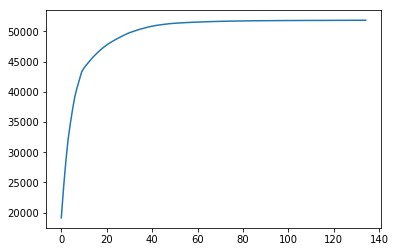

In [143]:
sort_country = OHE_Country.sum().sort_values(ascending=False)
a = sort_country.values.cumsum()
plt.plot(a)
plt.show()

In [145]:
nb_keep = (a < 0.90*max(a)).sum()  # 90 % of the variance

In [150]:
OHE_Country.drop(sort_country[nb_keep:].index, axis=1, inplace=True)

In [151]:
OHE_Country.head()

,Australia,Belgium,Canada,China,Denmark,France,Germany,Hong Kong,India,Italy,Japan,Mexico,Spain,Sweden,Turkey,UK,USA
tconst,,,,,,,,,,,,,,,,,
tt0002423,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
tt0003037,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
tt0003165,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
tt0003643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
tt0003952,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [156]:
OHE_Country = OHE_Country[OHE_Country.sum(axis=1) > 0]

In [161]:
final = pd.merge(final.reset_index(), OHE_Country.reset_index(), on = 'tconst').set_index("tconst")

In [163]:
final.drop("Country", axis=1, inplace=True)

# DVD

In [165]:
print(final.DVD.head())
print(final.DVD.value_counts().head(10))

tconst
tt0002423            NaN
tt0003037            NaN
tt0003165            NaN
tt0003643    18 Nov 2008
tt0003952            NaN
Name: DVD, dtype: object
29 Mar 2005    123
01 Jun 2004     88
31 May 2005     77
06 Sep 2005     74
01 Jan 1998     70
01 Mar 2005     69
08 Mar 2005     66
28 Aug 2001     59
15 Mar 2005     55
22 May 2001     53
Name: DVD, dtype: int64


In [166]:
final.drop("DVD", axis=1, inplace=True)

# Language

In [167]:
print(final.Language.head())
print(final.Language.value_counts().head(20))

tconst
tt0002423     German
tt0003037     French
tt0003165     French
tt0003643    English
tt0003952     French
Name: Language, dtype: object
English             18795
French               2465
Italian              2024
Japanese             1641
Hindi                1258
Spanish               949
German                759
English, Spanish      621
English, French       551
Turkish               551
Cantonese             493
Telugu                312
English, Italian      292
English, German       287
Mandarin              267
Malayalam             254
Swedish               207
French, English       201
Danish                160
Tamil                 135
Name: Language, dtype: int64


In [168]:
OHE_Language = final.Language.str.get_dummies(sep=", ")

In [169]:
sort_Language = OHE_Language.sum().sort_values(ascending=False)

In [178]:
sort_Language[sort_Language.index.str.contains("Sign") == True]

American Sign Language     39
Japanese Sign Language      5
Sign Languages              5
Indian Sign Language        3
Spanish Sign Language       3
British Sign Language       2
French Sign Language        2
Russian Sign Language       1
German Sign Language        1
Brazilian Sign Language     1
dtype: int64

In [182]:
OHE_Language.drop(sort_Language[2:].index, axis=1, inplace=True)

In [185]:
OHE_Language = OHE_Language[OHE_Language.sum(axis=1) > 0]
final = pd.merge(final.reset_index(), OHE_Language.reset_index(), on = 'tconst').set_index("tconst")
final.drop("Language", axis=1, inplace=True)

In [186]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27406 entries, tt0003037 to tt7889682
Data columns (total 85 columns):
primaryTitle      27406 non-null object
originalTitle     27406 non-null object
startYear         27406 non-null float64
runtimeMinutes    27406 non-null int64
averageRating     27406 non-null float64
numVotes          27406 non-null int64
Action            27406 non-null int64
Adventure         27406 non-null int64
Animation         27406 non-null int64
Biography         27406 non-null int64
Comedy            27406 non-null int64
Crime             27406 non-null int64
Drama             27406 non-null int64
Family            27406 non-null int64
Fantasy           27406 non-null int64
Film-Noir         27406 non-null int64
History           27406 non-null int64
Horror            27406 non-null int64
Musical           27406 non-null int64
Mystery           27406 non-null int64
Romance           27406 non-null int64
Sci-Fi            27406 non-null int64
Sport             27

In [190]:
final.columns = final.columns.tolist()[:-2] + ["Lang_En", "Lang_Fr"]

# Metascore

In [193]:
print(final.Metascore.head())
print(final.Metascore.value_counts().head(20))
final.Metascore.describe()

tconst
tt0003037   NaN
tt0003165   NaN
tt0003643   NaN
tt0003952   NaN
tt0004181   NaN
Name: Metascore, dtype: float64
49.0    135
52.0    127
57.0    125
64.0    123
66.0    122
53.0    122
61.0    121
55.0    120
47.0    120
56.0    117
45.0    115
65.0    115
58.0    114
62.0    110
63.0    108
51.0    104
68.0    102
48.0    101
60.0    100
59.0     99
Name: Metascore, dtype: int64


count    5623.000000
mean       55.051396
std        17.891189
min         1.000000
25%        42.000000
50%        55.000000
75%        68.000000
max       100.000000
Name: Metascore, dtype: float64

In [195]:
final.Metascore = final.Metascore/10.
final.Metascore = final.Metascore.fillna(final.averageRating)

In [197]:
final[final.averageRating != final.Metascore][["averageRating", "Metascore"]].head()

,averageRating,Metascore
tconst,,
tt0020269,7.3,8.9
tt0020697,7.8,8.8
tt0024216,7.9,9.0
tt0025316,8.1,8.7
tt0027977,8.5,9.6


# Plot

In [205]:
import nltk

from collections import Counter, defaultdict

from scipy.stats import entropy
from scipy.sparse import save_npz, load_npz

from nltk.corpus import stopwords

from collections import Counter, defaultdict
from scipy.sparse import save_npz, load_npz

from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.externals import joblib

from wordcloud import WordCloud

In [203]:
stemmer = nltk.stem.PorterStemmer()
tokenizer = nltk.RegexpTokenizer(r'(\w+|\d+)')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [204]:
final["Plot"].head(10)

tconst
tt0003037    In Part Two of Louis Feuillade's 5 1/2-hour ep...
tt0003165    After a body disappears from inside the prison...
tt0003643    Objected to date his sweetheart by his uncle, ...
tt0003952    Fantômas has been arrested and is jailed in Br...
tt0004181    A religious woman seeks to save her people fro...
tt0004707    A con man from the city dupes a wealthy countr...
tt0007167    Peggy, a rambunctious young American girl, goe...
tt0007361    Snow White is a motherless princess, who arous...
tt0007617    The story of Aladdin and the Princess Badr al-...
tt0007867    Nora Helmer has years earlier committed a forg...
Name: Plot, dtype: object

In [230]:
X = final["Plot"].fillna("").values

In [231]:
count_vect = CountVectorizer(tokenizer=None, stop_words="english")
tf_Matrix = count_vect.fit_transform(X)

In [232]:
tf_Matrix

<27406x33532 sparse matrix of type '<class 'numpy.int64'>'
	with 367967 stored elements in Compressed Sparse Row format>

In [233]:
tfidf = TfidfVectorizer(min_df = 10, max_df = 0.2, tokenizer=tokenize, stop_words="english")
tfidfMatrix = tfidf.fit_transform(X)

In [234]:
tfidfMatrix

<27406x4675 sparse matrix of type '<class 'numpy.float64'>'
	with 331183 stored elements in Compressed Sparse Row format>

In [247]:
no_topics = 20
no_top_words = 10

In [235]:
lda = LatentDirichletAllocation(
    n_components=no_topics, 
    max_iter=1,                   # Modèle très lent meme sur 1 itération et peu de topics
    learning_method='online', 
    learning_offset=50.,
    random_state=0,
    n_jobs=-1
).fit(tfidfMatrix)

In [237]:
display_topics(lda, tfidf.get_feature_names(), no_top_words)

Topic 0:
abduct competit addict 1970 extraordinari 1940 goal elimin flesh astronaut
Topic 1:
vivaci francisco drift loan pride dramat snake horn hugo polic
Topic 2:
destruct shock icon speech seasid convert greed delight sanctuari korea
Topic 3:
god 1960 soul vega planet inhabit unusu bulli cult reclus
Topic 4:
thirti epic depict mass trigger 70 heal oppress theft collector
Topic 5:
elit size misadventur prep cuban sixteen murphi parachut jill uniform
Topic 6:
capt deton spread cadet sexual mayb reli guy teenag convict
Topic 7:
senior coach comput sport super leas tech gruesom footbal gabriel
Topic 8:
accid reveal rose seclud screenwrit discov australian great survivor rip
Topic 9:
scandal start cia shift dig dimens domin 100 pretend howard
Topic 10:
uniqu clan ice holocaust mankind ash regular rachel jeopard sandi
Topic 11:
war sex mountain cia world documentari dure upsid intens art
Topic 12:
twist antholog basement relentless luca dimens occult segment pickpocket household
Topic 13:

In [248]:
nmf = NMF(
    n_components=no_topics, 
    random_state=1, 
    alpha=.1, 
    l1_ratio=.5, 
    init='nndsvd'
).fit(tfidfMatrix)

In [249]:
display_topics(nmf, tfidf.get_feature_names(), no_top_words)

Topic 0:
ha just affair sinc discov want marri time problem job
Topic 1:
young woman husband boy marri beauti meet lover relationship help
Topic 2:
war world dure ii german soldier american british civil french
Topic 3:
murder investig detect killer polic commit suspect crime accus case
Topic 4:
love fall marri meet beauti singer daughter wealthi princess anoth
Topic 5:
new york citi orlean street job apart start big meet
Topic 6:
life chang career turn save struggl real upsid day base
Topic 7:
man kill young anoth older hit innoc wealthi begin money
Topic 8:
girl teenag young parent beauti meet choru littl dream orphan
Topic 9:
year old boy later return 12 friend twenti 10 15
Topic 10:
famili home return wealthi daughter class son hous member children
Topic 11:
town small local sheriff arriv come resid villag southern big
Topic 12:
friend group help american work agent forc make time kill
Topic 13:
stori thi base true film tell set short told wa
Topic 14:
wife husband affair ex lover 

In [250]:
topic = nmf.transform(tfidfMatrix)

In [251]:
np.save("tfidfMatrix.npy", tfidfMatrix)
joblib.dump(nmf, 'nmf.pkl')

['nmf.pkl']

In [257]:
nmf = pd.DataFrame(topic)

In [258]:
nmf.columns = ["Topic_{}".format(i) for i in range(no_topics)]

In [266]:
final = pd.concat( [final.reset_index(), nmf], axis=1 ).set_index("tconst")

In [267]:
final.drop("Plot", axis=1, inplace=True)

# Rated

In [269]:
print(final.Rated.head())
print(final.Rated.value_counts().head(20))

tconst
tt0003037          NaN
tt0003165    NOT RATED
tt0003643    NOT RATED
tt0003952    NOT RATED
tt0004181          NaN
Name: Rated, dtype: object
R            6065
APPROVED     4003
PG-13        2315
PG           2288
NOT RATED    2230
PASSED       1436
G             558
UNRATED       544
GP            119
M              87
TV-G           71
TV-MA          69
TV-14          69
TV-PG          57
Approved       24
NC-17          23
X              22
M/PG            5
NR              3
TV-Y7           2
Name: Rated, dtype: int64


In [282]:
converter_rating_to_std = {
    "TV-Y":"G",
    "M":"PG",
    "GP":"PG",
    "X":"NC-17",
    "Not Rated": "UNRATED",
    "TV-G":"G",
    "TV-PG": "PG",
    "TV-MA": "NC-17",
    "TV-14" : "PG-13",
    "Approved" : "G",
    "Passed": "UNRATED",
    "Unrated": "UNRATED",
    "NOT RATED" : "UNRATED",
    "M/PG" : np.NaN,
    "NR" : np.NaN,
    "TV-Y7" : np.NaN,
    "15" : np.NaN,
    "6" : np.NaN
}

In [283]:
def convert(rating):
    if converter_rating_to_std.get(rating, False):
        return converter_rating_to_std[rating]
    else: 
        return rating

final["Rated"] = final["Rated"].apply(convert)

In [284]:
print(final.Rated.value_counts())

R           6065
APPROVED    4003
UNRATED     2775
PG          2551
PG-13       2384
PASSED      1436
G            655
NC-17        114
Name: Rated, dtype: int64


In [287]:
final['All_age'] = 0
final['Min_7'] = 0
final['Min_13'] = 0
final['All_PG'] = 0
final['Min_16'] = 0
final['Min_17'] = 0

def classify(ranking):
    if ranking in ["G", "APPROVED", "PASSED"] :
        final['All_age'] = 1
        final['Min_13'] = 1
        final['All_PG'] = 1
        final['Min_16'] = 1
        final['Min_17'] = 1
    if ranking == "PG-13":
        final['All_age'] = 0
        final['Min_13'] = 1
        final['All_PG'] = 1
        final['Min_16'] = 1
        final['Min_17'] = 1
    if ranking == "PG":
        final['All_age'] = 0
        final['Min_13'] = 0
        final['All_PG'] = 1
        final['Min_16'] = 1
        final['Min_17'] = 1
    if ranking == "R":
        final['All_age'] = 0
        final['Min_13'] = 0
        final['All_PG'] = 0
        final['Min_16'] = 1
        final['Min_17'] = 1
    if ranking == "NC-17":
        final['All_age'] = 0
        final['Min_13'] = 0
        final['All_PG'] = 0
        final['Min_16'] = 0
        final['Min_17'] = 1
    if ranking == "UNRATED":
        final['All_age'] = 0
        final['Min_13'] = 1
        final['All_PG'] = 1
        final['Min_16'] = 1
        final['Min_17'] = 1

In [288]:
final["Rated"].apply(classify)

tconst
tt0003037    None
tt0003165    None
tt0003643    None
tt0003952    None
tt0004181    None
tt0004707    None
tt0007167    None
tt0007361    None
tt0007617    None
tt0007867    None
tt0008150    None
tt0008188    None
tt0008196    None
tt0008550    None
tt0008827    None
tt0009133    None
tt0009915    None
tt0009937    None
tt0010137    None
tt0010162    None
tt0010227    None
tt0010357    None
tt0010703    None
tt0010844    None
tt0011114    None
tt0011302    None
tt0011324    None
tt0011387    None
tt0011474    None
tt0011565    None
             ... 
tt6739646    None
tt6741568    None
tt6811992    None
tt6923840    None
tt6951892    None
tt6977240    None
tt7011436    None
tt7018010    None
tt7023354    None
tt7026672    None
tt7027566    None
tt7064498    None
tt7073710    None
tt7078004    None
tt7122350    None
tt7153766    None
tt7156144    None
tt7158430    None
tt7164720    None
tt7241654    None
tt7260048    None
tt7264080    None
tt7321860    None
tt7340764    None
tt7

In [290]:
final.drop(["Min_7", "Rated"], axis=1, inplace=True)

In [291]:
final.to_csv("../datas/prepared/final_dataset_with_omdb.csv")

In [293]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27406 entries, tt0003037 to tt7889682
Columns: 108 entries, primaryTitle to Min_17
dtypes: float64(24), int64(80), object(4)
memory usage: 24.0+ MB


# Ratings

# Website